<a href="https://colab.research.google.com/github/fahadrafiq94/Machine-Learning/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flower_Classification

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas  as pd 
import matplotlib.image as mpimg 

##Getting Dataset from kaggle

In [ ]:
!pip install -q kaggle 

First expire the API token from account in kaggle and then create new token and `.json` file will be downloaded. Then upload `.json` file in colab. i.e in below cell 

In [ ]:
# Choose the kaggle.json file that you downloaded
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fahadrafiq8200","key":"5a2fcfab84eb19537782f38dd41e1406"}'}

In [ ]:
!mkdir ~/.kaggle # Run if can't find this folder 

In [ ]:
# Make directory named kaggle if needed else copy kaggle.json file there.
!cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# That's all ! You can check if everything's okay by running this command
!kaggle datasets list 

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            748  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           1957  
yasserh/wine-quality-dataset                                Wine Quality Dataset                                21KB  2022-01-15 19:15:11           1766  
yamqwe/netflix-showse                                       Netflix Shows                                       11KB  2022-01-23 00:03:01           1174  
iamsouravbanerjee/analytics-industry-salaries-2022-india    Data Profe

### Getting the data 

In [ ]:
# Download the data 
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 221M/225M [00:05<00:00, 62.5MB/s]
100% 225M/225M [00:05<00:00, 46.4MB/s]


In [ ]:
# Extract data
import zipfile
def unzip(filename):
  zip_ref = zipfile.ZipFile(filename , "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip("flowers-recognition.zip")

## Becoming One with data 

In [ ]:
import os 
def check_folder(folder_name):
  for dir_path ,  dir_names ,file_names in os.walk(folder_name):
    print(f"There are {len(dir_names)} and {len(file_names)} images in directory: {dir_path}") 

In [ ]:
check_folder("flowers")

There are 5 and 0 images in directory: flowers
There are 0 and 1052 images in directory: flowers/dandelion
There are 0 and 764 images in directory: flowers/daisy
There are 0 and 733 images in directory: flowers/sunflower
There are 0 and 984 images in directory: flowers/tulip
There are 0 and 784 images in directory: flowers/rose


## Create train and test folder 

In [ ]:
!pip install split-folders
import splitfolders

In [ ]:
input_folder = "flowers/"
splitfolders.ratio(input_folder , output="flower_split",
                  seed=42,
                  ratio=(.8,.2),
                   group_prefix=None)

Copying files: 4317 files [00:00, 4859.39 files/s]


In [ ]:
train_dir = "/content/flower_split/train"
test_dir = "/content/flower_split/val"

In [ ]:
check_folder(train_dir)

There are 5 and 0 images in directory: /content/flower_split/train
There are 0 and 841 images in directory: /content/flower_split/train/dandelion
There are 0 and 611 images in directory: /content/flower_split/train/daisy
There are 0 and 586 images in directory: /content/flower_split/train/sunflower
There are 0 and 787 images in directory: /content/flower_split/train/tulip
There are 0 and 627 images in directory: /content/flower_split/train/rose


In [ ]:
check_folder(test_dir)

There are 5 and 0 images in directory: /content/flower_split/val
There are 0 and 211 images in directory: /content/flower_split/val/dandelion
There are 0 and 153 images in directory: /content/flower_split/val/daisy
There are 0 and 147 images in directory: /content/flower_split/val/sunflower
There are 0 and 197 images in directory: /content/flower_split/val/tulip
There are 0 and 157 images in directory: /content/flower_split/val/rose


## Create Train anad test data

In [ ]:
import random 
def view_random_image(target_dir , target_class):
  target_folder = target_dir + "/" + target_class
  rand_img = random.sample(os.listdir(target_folder) , 1)
  img = mpimg.imread(target_folder + "/" + rand_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Shape of image : {img.shape}")
  return img

Shape of image : (240, 320, 3)


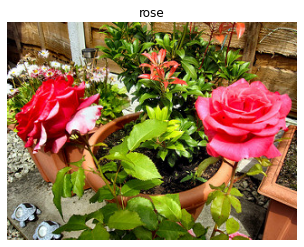

In [ ]:
img = view_random_image(train_dir , "rose")

In [ ]:
BATCH_SIZE=32
IMG_SIZE=(224,224)

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, 
                                                          label_mode="categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE,
                                                          seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMG_SIZE,
                                                        seed=42,
                                                        shuffle=False)

Found 3452 files belonging to 5 classes.
Found 865 files belonging to 5 classes.


In [ ]:
class_names = train_data.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

## Preprocessing 

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing 
from tensorflow.keras import Sequential 

### Data Augmentation Layer 

In [ ]:
# set seed 
tf.random.set_seed(42)
Augmented_layer = Sequential([
        preprocessing.RandomRotation(0.2),
        preprocessing.RandomFlip("horizontal"),
        preprocessing.RandomZoom(0.2),
        preprocessing.RandomHeight(0.2),
        preprocessing.RandomWidth(0.2),                   
])

TypeError: ignored

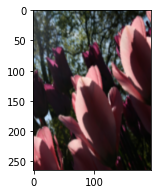

In [ ]:
for images, labels in train_data.take(1):
      plt.figure(figsize=(10, 10))
      first_image = images[0]
      for i in range(9):
          ax = plt.subplot(3, 3, i + 1)
          augmented_image = Augmented_layer(
              tf.expand_dims(first_image, 0), training=True
          )
          plt.imshow(augmented_image[0].numpy().astype("int32"))
          plt.title(int(labels[0]))
          plt.axis("off")

In [ ]:
checkpoint_path = "Models_checkpoints"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path ,
                                                         save_best_only = True,
                                                         save_weights_only=True,
                                                         verbose=1)

In [ ]:
import datetime
def create_tensorboard_callback(path , name):
  dir_path = path + "/" + name + "/" +  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback =  tf.keras.callbacks.TensorBoard(log_dir=dir_path)
  print(f"Saving tensorboard log files to {dir_path}")
  return tensorboard_callback

## Get the model from tensorflow hub 

In [ ]:
efficient_b7 = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1" 
resnet = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

## Modeling 

### Model_1 : `Efficient b7`

Without Data Augmentation 



In [ ]:
initial_epochs =5

In [ ]:
# Create the base model 
base_model = tf.keras.applications.EfficientNetB7(include_top=False)

# Freeze the base model (so pre_learned patterns remain)
base_model.trainable = False

# create inputs into the base model
inputs =tf.keras.layers.Input(shape=(224,224,3) ,name="input_layer")

# pass inputs to base model 
x = base_model(inputs)
# check the shape after passing it to base_model 
print(f"shape after base model: {x.shape}")

# Average pool the output of the base_model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_2D")(x)
print(f"After GlobalAveragePooling2D: {x.shape}")

# create the output layer 
outputs = tf.keras.layers.Dense(5 ,activation="softmax", name="output_layer")(x)

# create the model_1
model_1 = tf.keras.Model(inputs ,outputs , name= "Efficient_b7_model_No_Aug")

# Compile the model 
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model 
history_model_1 =  model_1.fit(train_data, 
                               epochs=initial_epochs,
                               steps_per_epoch=len(train_data),
                               validation_data =test_data,
                               validation_steps=len(test_data),
                               callbacks=[create_tensorboard_callback("tensorboard", "Efficient_b7_model_no_Aug"),
                                          checkpoint_callback])

shape after base model: (None, 7, 7, 2560)
After GlobalAveragePooling2D: (None, 2560)
Saving tensorboard log files to tensorboard/Efficient_b7_model_no_Aug/20220204-122431


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
108/108 [==============================] - ETA: 0s - loss: 0.6428 - accuracy: 0.7946
Epoch 00001: val_loss improved from inf to 0.38312, saving model to Models_checkpoints
108/108 [==============================] - 150s 1s/step - loss: 0.6428 - accuracy: 0.7946 - val_loss: 0.3831 - val_accuracy: 0.8717
Epoch 2/5
108/108 [==============================] - ETA: 0s - loss: 0.3805 - accuracy: 0.8772
Epoch 00002: val_loss improved from 0.38312 to 0.32282, saving model to Models_checkpoints
108/108 [==============================] - 105s 970ms/step - loss: 0.3805 - accuracy: 0.8772 - val_loss: 0.3228 - val_accuracy: 0.8983
Epoch 3/5
108/108 [==============================] - ETA: 0s - loss: 0.3221 - accuracy: 0.8969
Epoch 00003: val_loss improved from 0.32282 to 0.29625, saving model to Models_checkpoints
108/108 [==============================] - 105s 966ms/step - loss: 0.3221 - accuracy: 0.8969 - val_loss: 0.2962 - val_accuracy: 0.9052
Epoch 4/5
108/108 [=========================

In [ ]:
model_1.evaluate(test_data)

28/28 [==============================] - 21s 723ms/step - loss: 0.2705 - accuracy: 0.9087


[0.27052798867225647, 0.9086705446243286]

In [ ]:
model_1.save("/content/drive/MyDrive/Saved_models/flower_classfication_models/Efficient_b7")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Saved_models/flower_classfication_models/Efficient_b7/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
model_1.summary()

Model: "Efficient_b7_model_No_Aug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 global_avg_pooling_2D (Glob  (None, 2560)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 5)                 12805     
                                                                 
Total params: 64,110,492
Trainable params: 12,805
Non-trainable params: 64,097,687
_________________________________________________________________


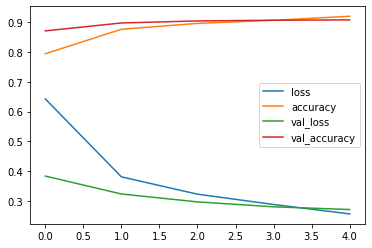

In [ ]:
pd.DataFrame(history_model_1.history).plot()

### Model_2 : Efficient b7 (Augmentation)  

In [ ]:
# Get the base model 
base_model = tf.keras.applications.EfficientNetB7(include_top=False) # False coz we want our own custmized output

# Freese the model 
base_model.trainable = False 

# Inputs for base_model
inputs = tf.keras.layers.Input(shape=(224,224,3) , name="input_layer")

# Augmentation layer 
x = Augmented_layer(inputs)

# Pass augmented data to model and dont train it 
x = base_model(x , training=False)

# Global Average pooling 2D 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_2D")(x)

# Output layer 
outputs = tf.keras.layers.Dense(5 ,activation="softmax" , name="output_layer")(x)

# Create the model 
model_2 = tf.keras.Model(inputs , outputs , name ="Efficient_b7_model_No_Aug")

# Compile the model 
model_2.compile(loss ="categorical_crossentropy",
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model 
history_model_2 = model_2.fit(train_data, 
                               epochs=initial_epochs,
                               steps_per_epoch=len(train_data),
                               validation_data =test_data,
                               validation_steps=len(test_data),
                               callbacks=[create_tensorboard_callback("tensorboard", "Efficient_b7_model_Aug"),
                                          checkpoint_callback])

Saving tensorboard log files to tensorboard/Efficient_b7_model_Aug/20220204-133539


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
108/108 [==============================] - ETA: 0s - loss: 0.7496 - accuracy: 0.7378
Epoch 00001: val_loss did not improve from 0.27053
108/108 [==============================] - 235s 2s/step - loss: 0.7496 - accuracy: 0.7378 - val_loss: 0.4449 - val_accuracy: 0.8509
Epoch 2/5
108/108 [==============================] - ETA: 0s - loss: 0.4816 - accuracy: 0.8355
Epoch 00002: val_loss did not improve from 0.27053
108/108 [==============================] - 164s 2s/step - loss: 0.4816 - accuracy: 0.8355 - val_loss: 0.3694 - val_accuracy: 0.8832
Epoch 3/5
108/108 [==============================] - ETA: 0s - loss: 0.4206 - accuracy: 0.8543
Epoch 00003: val_loss did not improve from 0.27053
108/108 [==============================] - 151s 1s/step - loss: 0.4206 - accuracy: 0.8543 - val_loss: 0.3300 - val_accuracy: 0.8948
Epoch 4/5
108/108 [==============================] - ETA: 0s - loss: 0.3924 - accuracy: 0.8676
Epoch 00004: val_loss did not improve from 0.27053
108/108 [===========

In [ ]:
model_2.evaluate(test_data)

28/28 [==============================] - 21s 732ms/step - loss: 0.3069 - accuracy: 0.8971


[0.3068866431713104, 0.8971098065376282]

In [ ]:
model_2.save("/content/drive/MyDrive/Saved_models/flower_classfication_models/Efficient_b7_with_Aug.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
loaded_model_2 = tf.keras.models.load_model("/content/drive/MyDrive/Saved_models/flower_classfication_models/Efficient_b7_with_Aug.h5")

In [ ]:
loaded_model_2.evaluate(test_data)

28/28 [==============================] - 27s 725ms/step - loss: 0.3727 - accuracy: 0.8832


[0.37267035245895386, 0.8832370042800903]

## Load and test on custom data 

In [ ]:
test_model = tf.keras.models.load_model("/content/drive/MyDrive/Saved_models/flower_classfication_models/Efficient_b7")

In [ ]:
pred = test_model.predict(test_data)

In [ ]:
pred 

array([[8.9586389e-01, 7.9761527e-02, 1.1795556e-02, 3.9527197e-03,
        8.6262366e-03],
       [5.4802734e-01, 2.3706903e-01, 1.8882655e-02, 3.1600408e-02,
        1.6442055e-01],
       [9.8805553e-01, 5.1033027e-03, 1.0250794e-03, 5.4976894e-03,
        3.1846555e-04],
       ...,
       [6.1900355e-02, 2.8948644e-01, 3.8350314e-02, 1.0672872e-01,
        5.0353414e-01],
       [1.8761273e-02, 3.3242253e-03, 1.7335220e-01, 4.3220370e-04,
        8.0413008e-01],
       [1.0785430e-02, 1.3137234e-02, 3.1984933e-02, 5.7413489e-01,
        3.6995745e-01]], dtype=float32)

In [ ]:
len(pred)

865

In [ ]:
pred.shape

(865, 5)

In [ ]:
pred_classes = pred.argmax(axis=1)
class_names[pred_classes[-1]]

'sunflower'

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
test_dir

'/content/flower_split/val'

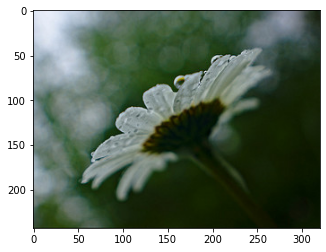

In [ ]:
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + "/" + class_name + "/" + filename
plt.imshow(mpimg.imread(filepath))

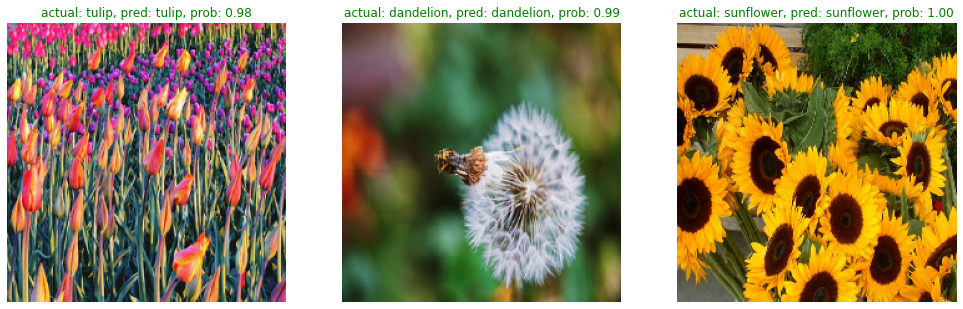

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + "/" + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred = test_model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred.max():.2f}", c=title_color)
  plt.axis(False);